In [1]:
import numpy as np
import pandas as pd
import sklearn
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

# Question 1 - K-Means

## Implement the K-Means algorithm with a random initialization. Recall that there are two steps: given the centers, computing the clusters, and given the clusters, computing the centers. As discussed in class, the second is straightforward. Describe how you do the first step.

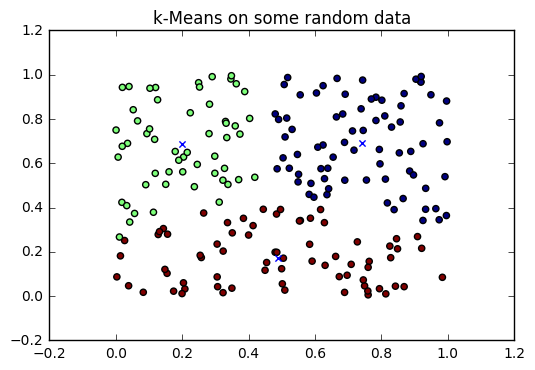

In [2]:
dimension = 2
k = 3 #how many clusters we want
num_of_points = 200

#to get new centers
def k_means_get_centers():
    centers = []
    for i in range(0, k): #getting the centers
        new_center = []
        for d in range(0, dimension):
            new_center.append(np.random.uniform())
        centers.append(new_center)
    return centers

#calculating the distance of each point from each center and assigning each point to the closest center
def k_means_assign_points_to_centers(points, centers):
    colors = []
    for point in points:
        distance = []
        for j in range(k):
            distance.append(np.linalg.norm(point - centers[j]))
        colors.append(np.argmin(distance))
    return colors

def update_centers(points, colors):
    clusters = list()
    for _ in range(k): 
        clusters.append([])
    for i in range(len(colors)): 
        clusters[colors[i]].append(i)
    centers = [] 
    
    for j in range(0,k): 
        new_center = []
        for i in range(0,dimension): 
            sum = 0.0
            count = 0.0
            for z in clusters[j]:
                sum = sum + points[z][i]
                count = count + 1
            new_center.append(sum/count)
        centers.append(new_center)
    return centers
    
#I will generate some random points to see if my clustering algorithm makes sense
points = np.random.rand(num_of_points, dimension)

centers = k_means_get_centers()
colors = k_means_assign_points_to_centers(points, centers)

for num in range(0, 20):
    new_centers = update_centers(points, colors)
    colors = k_means_assign_points_to_centers(points, new_centers)

centers = np.matrix(new_centers)
if (dimension==3):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], c= colors, marker = '.')
    plt.scatter(centers[:,0], centers[:,1], centers[:,2],marker = 'X', c = 'r')
else:
    plt.scatter(points[:, 0], points[:, 1], c = colors)
    plt.scatter(centers[:,0], centers[:,1], marker = 'x')
    plt.title("k-Means on some random data")
plt.show()

### Need to describe how I computed clusters given centers

## K-Means++

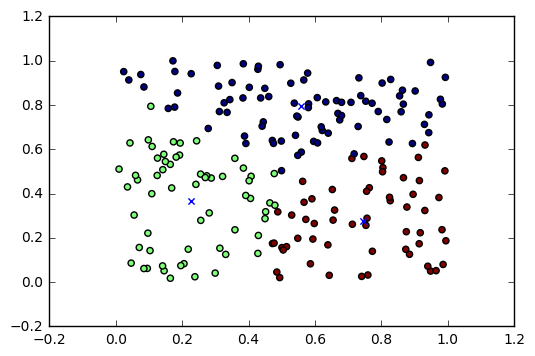

In [3]:
dimension = 2
k = 3 #how many clusters we want
num_of_points = 200

#for a given point, find the squared distance between each point and the closest center already defined
def shortest_squared_distance(centers, points):
    distances = []
    for point in points:
        current_shortest_distance = []
        for center in centers:
            current_shortest_distance.append(np.linalg.norm(center-point)**2)
        distances.append(current_shortest_distance[np.argmin(current_shortest_distance)])
    return distances

#calculating the distance of each point from each center and assigning each point to the closest center
def k_means_plus_assign_points_to_centers(points, centers):
    colors = []
    for point in points:
        distance = []
        for j in range(k):
            distance.append(np.linalg.norm(point - centers[j]))
        colors.append(np.argmin(distance))
    return colors

#calculate the probability for each point, which will be weighted in proportion to the squared distance between it and
#the nearest center
def calc_probs(squared_distances):
    probabilities = []
    for d in squared_distances:
        probabilities.append(d/np.sum(np.array(squared_distances)))
    return probabilities
    
def k_means_plus_get_init_centers(points):
    centers = []
    centers.append(points[np.random.randint(0, num_of_points+1)]) #first center is a randomly selected point
    for num in range(1,k):
        squared_distances = shortest_squared_distance(centers, points)
        probs = calc_probs(squared_distances)
        index = np.random.choice(num_of_points, p=probs)
        centers.append(points[index])
    return(centers)

def k_means_plus_update_centers(points, colors):
    clusters = list()
    for _ in range(k): 
        clusters.append([])
    for i in range(len(colors)): 
        clusters[colors[i]].append(i)
    centers = [] 
    
    for j in range(0,k): 
        new_center = []
        for i in range(0,dimension): 
            sum = 0.0
            count = 0.0
            for z in clusters[j]:
                sum = sum + points[z][i]
                count = count + 1
            new_center.append(sum/count)
        centers.append(new_center)
    return centers
        
    
points = np.random.rand(num_of_points, dimension)
centers = k_means_plus_get_init_centers(points)
colors = k_means_plus_assign_points_to_centers(points, centers)

for num in range(0, 20):
    new_centers = k_means_plus_update_centers(points, colors)
    colors = k_means_plus_assign_points_to_centers(points, new_centers)

centers = np.matrix(new_centers)
if (dimension==3):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], c= colors, marker = '.')
    plt.scatter(centers[:,0], centers[:,1], centers[:,2],marker = 'X', c = 'r')
else:
    plt.scatter(points[:, 0], points[:, 1], c = colors)
    plt.scatter(centers[:,0], centers[:,1], marker = 'x')
plt.show()

## K-Means++ with Iris dataset

In [4]:
iris = pd.read_csv("iris_data.csv")
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [5]:
x = iris["Sepal.Length"]
y = iris["Sepal.Width"]

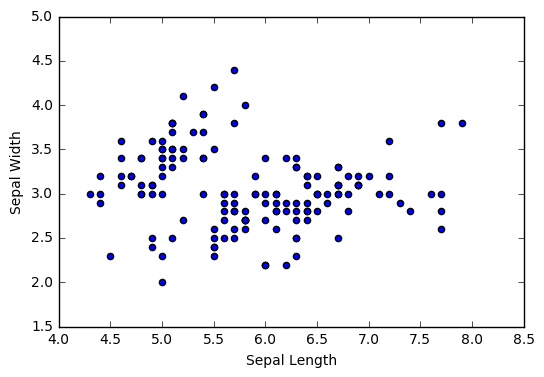

In [6]:
plt.scatter(x, y)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

In [7]:
#I copied the above code again because there were quite a few variable names which I had to change, and a bunch of other changes
#to make it work for the iris dataset

#for a given point, find the squared distance between each point and the closest center already defined
def shortest_squared_distance(centers, points):
    distances = []
    for point in points:
        current_shortest_distance = []
        for center in centers:
            current_shortest_distance.append(np.linalg.norm(center-point)**2)
        distances.append(current_shortest_distance[np.argmin(current_shortest_distance)])
    return distances

#calculating the distance of each point from each center and assigning each point to the closest center
def k_means_plus_assign_points_to_centers(points, centers, num_clusters):
    colors = []
    for point in points:
        distance = []
        for j in range(num_clusters):
            distance.append(np.linalg.norm(point - centers[j]))
        colors.append(np.argmin(distance))
    return colors

def calc_probs(squared_distances):
    probabilities = []
    for d in squared_distances:
        probabilities.append(d/np.sum(np.array(squared_distances)))
    return probabilities
    
def k_means_plus_get_init_centers(points, num_clusters):
    centers = []
    centers.append(points[np.random.randint(0, points.shape[0]+1)]) #first center is a randomly selected point
    for num in range(1,num_clusters):
        squared_distances = shortest_squared_distance(centers, points)
        probs = calc_probs(squared_distances)
        index = np.random.choice(points.shape[0], p=probs)
        centers.append(points[index])
    return(centers)

def k_means_plus_update_centers(points, colors, num_clusters):
    clusters = list()
    for _ in range(num_clusters): 
        clusters.append([])
    for i in range(len(colors)): 
        clusters[colors[i]].append(i)
    centers = [] 
    
    for j in range(0,num_clusters): 
        new_center = []
        for i in range(0,dimension): 
            sum = 0.0
            count = 0.0
            for z in clusters[j]:
                sum = sum + points[z][i]
                count = count + 1
            new_center.append(sum/count)
        centers.append(new_center)
    return centers

def k_means_plusplus_iris(num_clusters):
    d = {'Sepal Length': x, 'Sepal Width':y}
    points = pd.DataFrame(data = d)
    points = np.array(points)
    centers = k_means_plus_get_init_centers(points, num_clusters)
    colors = k_means_plus_assign_points_to_centers(points, centers, num_clusters)

    for num in range(0, 20):
        new_centers = k_means_plus_update_centers(points, colors, num_clusters)
        colors = k_means_plus_assign_points_to_centers(points, new_centers, num_clusters)

    centers = np.matrix(new_centers)
    if (dimension==3):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection="3d")
        ax.scatter(points[:, 0], points[:, 1], points[:, 2], c= colors, marker = '.')
        plt.scatter(centers[:,0], centers[:,1], centers[:,2],marker = 'X', c = 'r')
    else:
        plt.scatter(points[:, 0], points[:, 1], c = colors)
        plt.scatter(centers[:,0], centers[:,1], marker = 'x')
        plt.xlabel("Sepal Length")
        plt.ylabel("Sepal Width")
        title = "Iris K-Means++ clustering with " + str(num_clusters) + " clusters"
        plt.title(title)
    plt.show()

### With k = 2

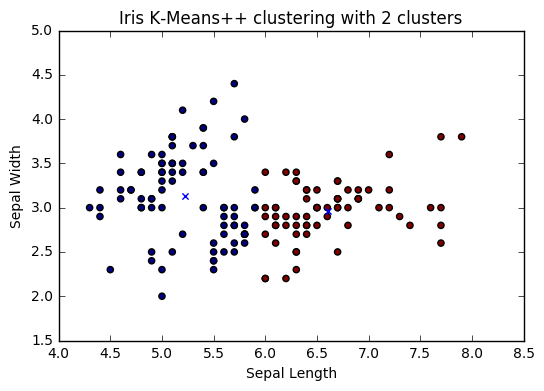

In [8]:
k_means_plusplus_iris(2)

### With k = 3

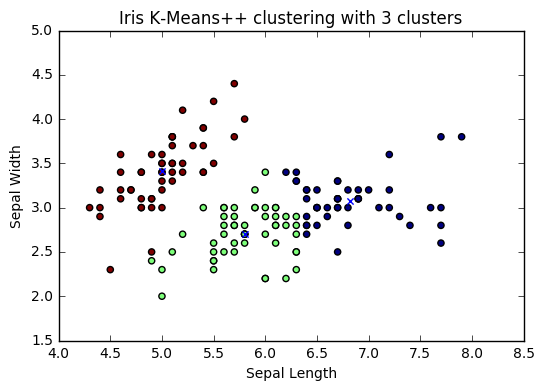

In [9]:
k_means_plusplus_iris(3)

### With k = 4

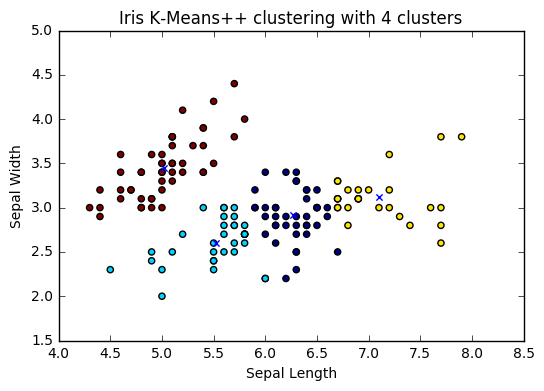

In [10]:
k_means_plusplus_iris(4)

### With k = 5

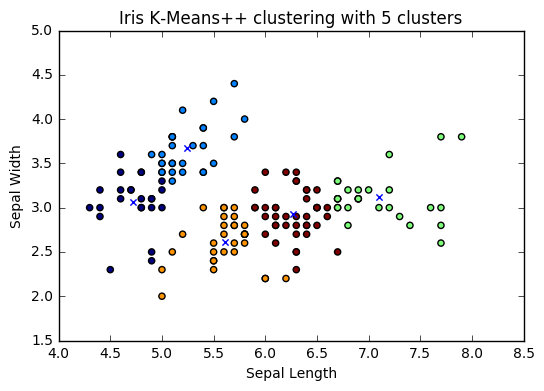

In [11]:
k_means_plusplus_iris(5)

# Question 3

Load the data from the two-dimensional two moons.csv and the three-dimensional linked chains.csv.
Each row represents a point. Note that the first column gives the ground truth – the cluster
identity of each point – and so can be ignored. Plot each in 2d and 3d respectively, so you
can see what is going on. It is fairly clear (visually) that there are two clusters in each.

In [12]:
two_moons = pd.read_csv("two_moons.csv", header = None)
linked_chains = pd.read_csv("linked_chains.csv", header = None)

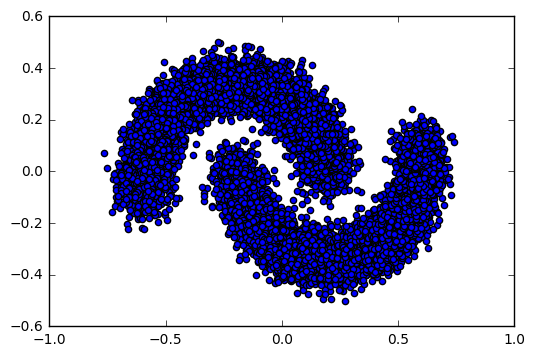

In [15]:
plt.scatter(two_moons[1], two_moons[2])

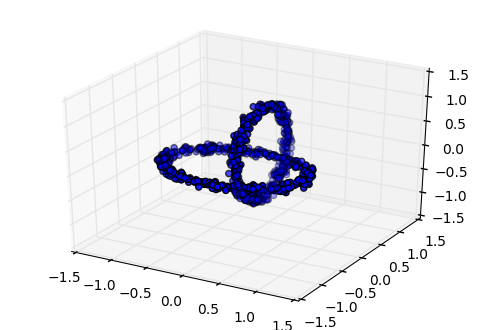

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(linked_chains[1], linked_chains[2], linked_chains[3])

## Running K-Means++ on Two moons dataset

In [17]:
x = two_moons[1]
y= two_moons[2]

def k_means_moons(num_clusters):    
    d = {'X axis': x, 'Y axis':y}
    points = pd.DataFrame(data = d)
    points = np.array(points)
    centers = k_means_plus_get_init_centers(points, num_clusters)
    colors = k_means_plus_assign_points_to_centers(points, centers, num_clusters)

    for num in range(0, 20):
        new_centers = k_means_plus_update_centers(points, colors, num_clusters)
        colors = k_means_plus_assign_points_to_centers(points, new_centers, num_clusters)

    centers = np.matrix(new_centers)
    if (dimension==3):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection="3d")
        ax.scatter(points[:, 0], points[:, 1], points[:, 2], c= colors, marker = '.')
        plt.scatter(centers[:,0], centers[:,1], centers[:,2],marker = 'X', c = 'r')
    else:
        plt.scatter(points[:, 0], points[:, 1], c = colors)
        plt.scatter(centers[:,0], centers[:,1], marker = 'x')
        title = "Two Moons K-Means++ clustering with " + str(num_clusters) + " clusters"
        plt.title(title)
    plt.show()

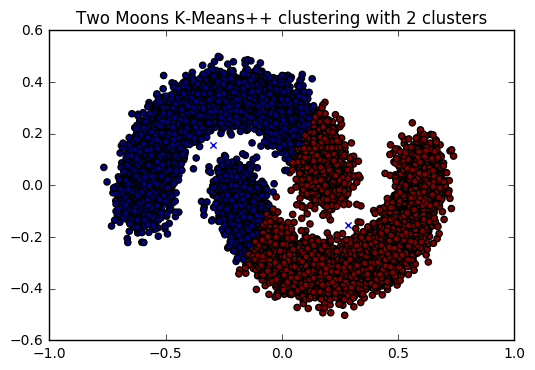

In [18]:
k_means_moons(2)

## Running K-Means++ on Linked Chains dataset

In [19]:
dimension = 3

x = linked_chains[1]
y = linked_chains[2]
z = linked_chains[3]

def k_means_chains(num_clusters):    
    d = {'X axis': x, 'Y axis':y, 'Z axis': z}
    points = pd.DataFrame(data = d)
    points = np.array(points)
    centers = k_means_plus_get_init_centers(points, num_clusters)
    colors = k_means_plus_assign_points_to_centers(points, centers, num_clusters)

    for num in range(0, 20):
        new_centers = k_means_plus_update_centers(points, colors, num_clusters)
        colors = k_means_plus_assign_points_to_centers(points, new_centers, num_clusters)

    centers = np.matrix(new_centers)
    
    newc = []
    for color in colors:
        if color==1:
            newc.append('r')
        else:
            newc.append('b')
    
    plt.scatter(points[:, 0], points[:, 1], c= newc, marker = 'o')
    plt.scatter(centers[:,0], centers[:,1], centers[:,2])
    plt.show()

ValueError: could not broadcast input array from shape (2) into shape (1)

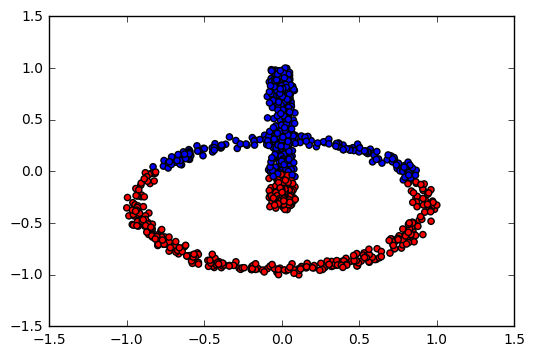

In [20]:
k_means_chains(2)